<a href="https://colab.research.google.com/github/NiEl0503/SimuladorNivel1/blob/main/Simulador1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulador 1 - Télos

**Análise de vendas de Carro no Nordeste do Brasil**

Contextualizando:

Você aprendeu que o trabalho de um profissional de dados é gerar insights que apoiem as tomadas de decisão estratégicas de uma empresa. Agora, você poderá fazer isso na prática, ajudando uma rede de concessionárias a gerar um relatório detalhado sobre suas lojas no nordeste, respondendo a algumas perguntas e pedidos.

**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importando as bases de dados**

In [14]:
pesquisa_populacao = pd.read_excel('/content/Pesquisa_Populacao_Geral_e1ac3aec0e.xlsx')
satisfacao_cliente = pd.read_excel('/content/Satisfacao_dos_Clientes_90541b83c0.xlsx')
total_vendas = pd.read_excel('/content/Total_de_vendas_5167b13be8.xlsx')
vendas_2023 = pd.read_excel('/content/Vendas_de_2023_8012352864.xlsx')

**Revendo os df e obtendo informações deles**

In [4]:
pesquisa_populacao.head()

,Nome,Conhece a conessionária?,Cidade
0,João,Sim,Fortaleza
1,Maria,Sim,Fortaleza
2,José,Sim,Fortaleza
3,Ana,Não,Fortaleza
4,Carlos,Sim,Fortaleza


In [17]:
pesquisa_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Nome                      270 non-null    object
 1   Conhece a conessionária?  270 non-null    object
 2   Cidade                    270 non-null    object
dtypes: object(3)
memory usage: 6.5+ KB


In [6]:
satisfacao_cliente.head()

,Loja,Satisfação dos clientes (1 - 100),Probabilidade do cliente retornar (0% - 100%)
0,Rio Branco,40,23.0
1,Macapá,80,72.0
2,Manaus,20,12.0
3,Vitória,90,66.0
4,Goiânia,60,15.0


In [18]:
satisfacao_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Loja                                           28 non-null     object 
 1   Satisfação dos clientes (1 - 100)              28 non-null     int64  
 2   Probabilidade do cliente retornar (0% - 100%)  19 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
total_vendas.head()

,Ano,Total de Vendas
0,2004,8.416882e+08
1,2005,8.466351e+08
2,2006,8.515821e+08
3,2007,8.565290e+08
4,2008,8.614759e+08


In [19]:
total_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ano              21 non-null     int64  
 1   Total de Vendas  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [15]:
vendas_2023.head()

,Cidade,31/01/2023,28/02/2023,31/03/2023,30/04/2023,31/05/2023,30/06/2023,31/07/2023,31/08/2023,30/09/2023,31/10/2023,30/11/2023,31/12/2023
0,Fortaleza,13429000,15069700,10240000,9546000,16879400,19880000,8456200,12300000,10002450,9546000,12010350,19546000
1,Recife,9024300,10165210,8023740,9508230,7426190,11234560,6758920,8173210,9876540,7289010,8457230,7132450
2,Natal,9014100,6027310,7184090,8715240,4839170,5392860,7251830,6182750,8329560,7673400,9800200,8114720
3,João Pessoa,5101000,5478210,6674930,4162850,7281490,3826170,6937520,5593280,4759160,6334710,7148250,3872150
4,São Luis,6811110,8394720,6142890,7531060,5128930,9273810,6785240,5462190,7365980,8713050,5927130,6598240


In [20]:
vendas_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cidade      9 non-null      object 
 1   31/01/2023  9 non-null      int64  
 2   28/02/2023  9 non-null      int64  
 3   31/03/2023  9 non-null      int64  
 4   30/04/2023  9 non-null      int64  
 5   31/05/2023  9 non-null      int64  
 6   30/06/2023  9 non-null      int64  
 7   31/07/2023  9 non-null      int64  
 8   31/08/2023  9 non-null      int64  
 9   30/09/2023  9 non-null      int64  
 10  31/10/2023  9 non-null      int64  
 11  30/11/2023  9 non-null      int64  
 12  31/12/2023  9 non-null      int64  
 13  Média       9 non-null      float64
dtypes: float64(1), int64(12), object(1)
memory usage: 1.1+ KB


**Perguntas de Negócios**

**1) Qual é a loja com a maior média de vendas em 2023?**


In [24]:
# Removendo a Coluna Cidade do Data Frame vendas_2023
lojas = vendas_2023.drop(columns=['Cidade'])

# Calculando a Média dos valores
vendas_2023['Média'] = lojas.mean(axis=1)

# Ordenanando as cidades pela média de vendas em ordem decrescente
vendas_2023.sort_values('Média', ascending=False, inplace=True)

vendas_2023

,Cidade,31/01/2023,28/02/2023,31/03/2023,30/04/2023,31/05/2023,30/06/2023,31/07/2023,31/08/2023,30/09/2023,31/10/2023,30/11/2023,31/12/2023,Média
0,Fortaleza,13429000,15069700,10240000,9546000,16879400,19880000,8456200,12300000,10002450,9546000,12010350,19546000,1.307542e+07
5,Teresina,10359840,9582370,10764820,8325940,7123910,10157230,7694250,9246810,11883050,8375620,11029340,7438190,9.331781e+06
6,Aracaju,7813200,10542870,9456130,8769420,11295760,7023410,11768940,7894520,8195630,10314780,7362910,9821540,9.188259e+06
8,Salvador,8450000,9562180,10873920,7415060,8254790,11367250,7028930,9786340,8142970,10523810,7295640,8914730,8.967968e+06
7,Maceió,3211000,8974260,11435090,7628350,10657230,7189240,9246810,10283570,7862150,8934010,11092870,7425690,8.661689e+06
1,Recife,9024300,10165210,8023740,9508230,7426190,11234560,6758920,8173210,9876540,7289010,8457230,7132450,8.589132e+06
2,Natal,9014100,6027310,7184090,8715240,4839170,5392860,7251830,6182750,8329560,7673400,9800200,8114720,7.377102e+06
4,São Luis,6811110,8394720,6142890,7531060,5128930,9273810,6785240,5462190,7365980,8713050,5927130,6598240,7.011196e+06
3,João Pessoa,5101000,5478210,6674930,4162850,7281490,3826170,6937520,5593280,4759160,6334710,7148250,3872150,5.597477e+06


**De acordo com os dados analisados, podemos perceber que a loja com maior média de vendas em 2023 foi Fortaleza com valor de 1.307542e+07**

**2) Represente o ranking da média de vendas das lojas com um gráfico de
barras.**


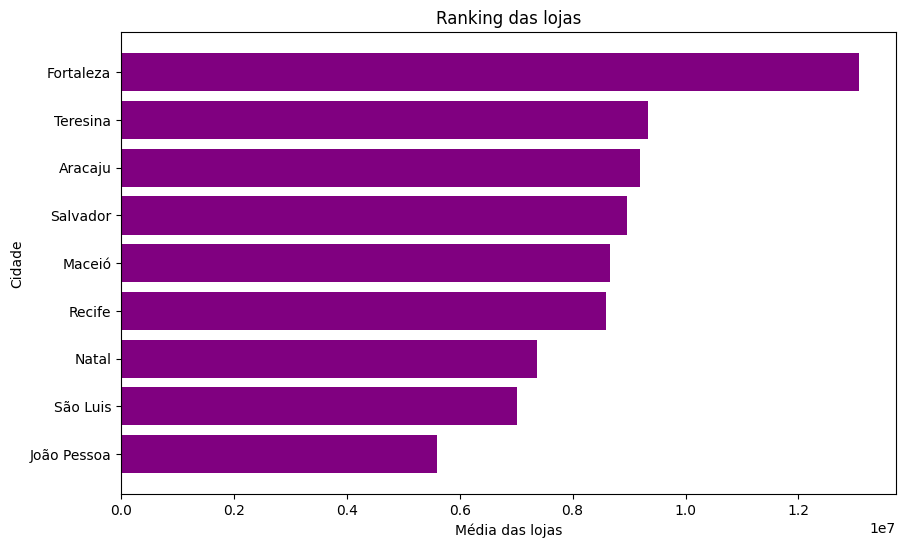

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(vendas_2023['Cidade'], vendas_2023['Média'], color = 'purple')

# titulos
plt.xlabel('Média das lojas')
plt.ylabel('Cidade')
plt.title('Ranking das lojas')

# ordenando o grafico
plt.gca().invert_yaxis()
plt.show()


**3) De acordo com a pesquisa de mercado feita, quais lojas são conhecidas
em sua cidade e quais não são? (para que uma loja seja considerada
conhecida, a maior parte das pessoas na pesquisa deve dizer que
conhece a loja, ou seja, a resposta afirmativa deve ser a moda).**


In [ ]:
cidades = ['Fortaleza', 'Recife', 'São Luis', 'João Pessoa', 'Salvador', 'Natal', 'Teresina', 'Maceió', 'Aracaju']

for cidad in cidades:
    cidad_data = pesquisa_populacao[pesquisa_populacao['Cidade'] == cidad]
    moda = cidad_data['Conhece a conessionária?'].mode()
    print(f"{cidad}: {moda}")


Fortaleza: 0    Sim
Name: Conhece a conessionária?, dtype: object
Recife: 0    Não
Name: Conhece a conessionária?, dtype: object
São Luis: 0    Não
Name: Conhece a conessionária?, dtype: object
João Pessoa: 0    Não
Name: Conhece a conessionária?, dtype: object
Salvador: 0    Não
Name: Conhece a conessionária?, dtype: object
Natal: 0    Não
Name: Conhece a conessionária?, dtype: object
Teresina: 0    Não
Name: Conhece a conessionária?, dtype: object
Maceió: 0    Não
Name: Conhece a conessionária?, dtype: object
Aracaju: 0    Não
Name: Conhece a conessionária?, dtype: object


| Cidade       | Resposta |
|--------------|----------|
| Fortaleza    | Sim      |
| Recife       | Não      |
| São Luis     | Não      |
| João Pessoa  | Não      |
| Salvador     | Não      |
| Natal        | Não      |
| Teresina     | Não      |
| Maceió       | Não      |
| Aracaju      | Não      |



**4) Quais lojas estão no quartil que tem as piores médias de vendas de
2023?**

In [9]:
media_vendas = vendas_2023.drop(columns=['Cidade'])

# calculo media
vendas_2023['Média'] = media_vendas.mean(axis=1)

# calculo quartil inferior (25%)
quartil_piores = vendas_2023['Média'].quantile(0.25)

# calculo piores medias de vendas
lojas_quartil_piores = vendas_2023[vendas_2023['Média'] <= quartil_piores]

lojas_quartil_piores

,Cidade,31/01/2023,28/02/2023,31/03/2023,30/04/2023,31/05/2023,30/06/2023,31/07/2023,31/08/2023,30/09/2023,31/10/2023,30/11/2023,31/12/2023,Média
2,Natal,9014100,6027310,7184090,8715240,4839170,5392860,7251830,6182750,8329560,7673400,9800200,8114720,7.377102e+06
3,João Pessoa,5101000,5478210,6674930,4162850,7281490,3826170,6937520,5593280,4759160,6334710,7148250,3872150,5.597477e+06
4,São Luis,6811110,8394720,6142890,7531060,5128930,9273810,6785240,5462190,7365980,8713050,5927130,6598240,7.011196e+06


As lojas que estão no pior quartil de vendas em 2023 são **Natal, São Luis e João Pessoa**

**5) Quais lojas do pior quartil é a mais inconstante em suas vendas?**

In [22]:
# Calcular a media
vendas_2023['Média'] = vendas_2023.drop(columns=['Cidade']).mean(axis=1)

# Quartil inferior
quartil_piores = vendas_2023['Média'].quantile(0.25)

# Filtrar as lojas do quartil inferior
lojas_quartil_piores = vendas_2023[vendas_2023['Média'] <= quartil_piores]

# Calcular o desvio padrão
# Removemos a coluna ‘Cidade’ e ‘Média’ para obter apenas os dados de vendas
lojas_quartil_piores = vendas_2023[vendas_2023['Média'] <= quartil_piores].copy()
lojas_quartil_piores.set_index('Cidade', inplace=True)

# Calcular o desvio padrão das vendas (eliminando 'Média')
desvio_padrao = lojas_quartil_piores.drop(columns='Média').std(axis=1)

# Adicionando desvio padrão ao DataFrame usando .loc
lojas_quartil_piores.loc[:, 'Desvio_Padrao'] = desvio_padrao

# Encuentra la loja com o maior desvio padrão
loja_mais_inconstante = lojas_quartil_piores.loc[lojas_quartil_piores['Desvio_Padrao'].idxmax()]

# Imprimir la loja más inconsistente
print("A loja mais inconstante é:")
print(loja_mais_inconstante[['Desvio_Padrao']])

A loja mais inconstante é:
Desvio_Padrao    1.524363e+06
Name: Natal, dtype: float64


**Natal** possui o maior desvio padrão (1,524363e+06), o que significa que é a loja mais inconstante, ou seja, suas vendas oscilam mais mês a mês.

**6) De acordo com os dados temporais apresentados, como serão as
vendas dos próximos 3 anos para a região nordeste da empresa**

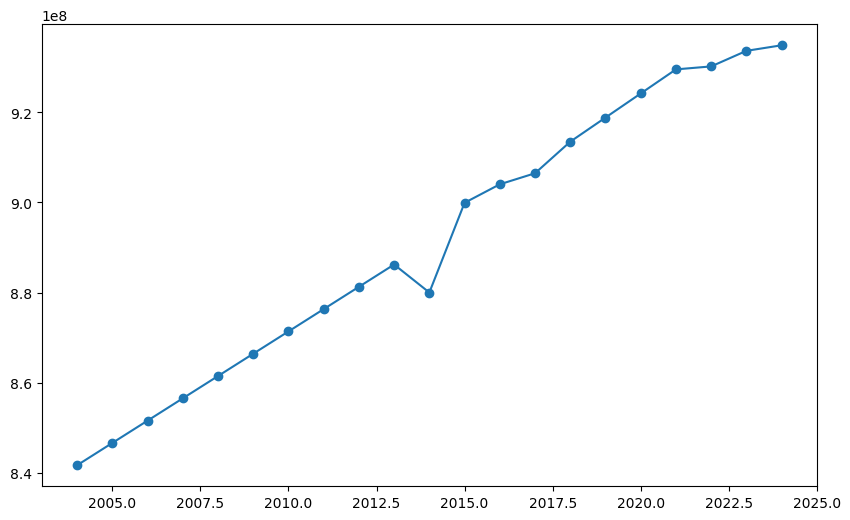

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(total_vendas['Ano'], total_vendas['Total de Vendas'], marker='o')

In [ ]:
# Calcular a média móvel
total_vendas['MM_5'] = total_vendas['Total de Vendas'].rolling(window=5).mean()
print(total_vendas)

,Ano,Total de Vendas,MM_5
0,2004,8.416882e+08,NaN
1,2005,8.466351e+08,NaN
2,2006,8.515821e+08,NaN
3,2007,8.565290e+08,NaN
4,2008,8.614759e+08,8.515821e+08
5,2009,8.664229e+08,8.565290e+08
6,2010,8.713698e+08,8.614759e+08
7,2011,8.763167e+08,8.664229e+08
8,2012,8.812637e+08,8.713698e+08
9,2013,8.862106e+08,8.763167e+08


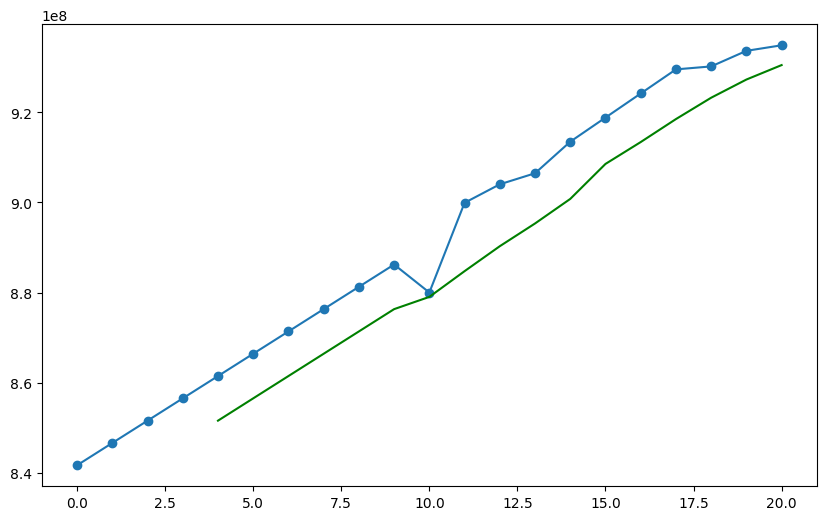

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(total_vendas.index, total_vendas['Total de Vendas'], marker='o')
plt.plot(total_vendas.index, total_vendas['MM_5'], label='Média Móvel (5 anos)', color= 'green')

In [ ]:
total_vendas.index = total_vendas['Ano']

In [ ]:
total_vendas.drop(columns='Ano', inplace=True)

In [ ]:
previsoes = []
anos_futuros = [2025, 2026, 2027]

for i in range(3):
    previsao_proximo_ano = total_vendas['MM_5'].iloc[-1] + (total_vendas['MM_5'].iloc[-1] - total_vendas['MM_5'].iloc[-2])
    previsoes.append(previsao_proximo_ano)
    novo_ano = total_vendas.index[-1] + 1
    total_vendas.loc[novo_ano] = [previsao_proximo_ano, previsao_proximo_ano]
    total_vendas['MM_5'] = total_vendas['Total de Vendas'].rolling(window=5).mean()

previsoes

[933649421.9600002, 934244835.584, 934246167.9056]

Ano: 2025, Previsão de Vendas: 934595986.8869288 <br>
Ano: 2026, Previsão de Vendas: 934615896.1254518 <br>
Ano: 2027, Previsão de Vendas: 934592113.8631139

**7) Utilize dados de lojas do resto do Brasil para treinar um modelo de
regressão linear e então utilize-o para tentar prever a probabilidade de
um cliente voltar a fazer neggócio com as lojas do nordeste de acordo com o seu nível de satisfação**


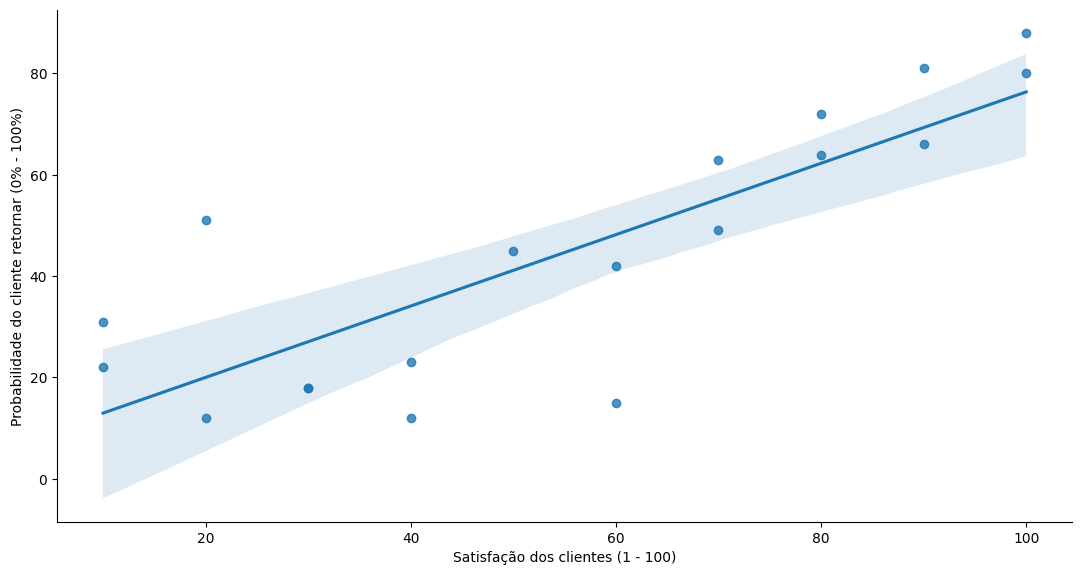

In [ ]:
# gráfico de dispersão com lmplo
ax = sns.lmplot(x='Satisfação dos clientes (1 - 100)', y='Probabilidade do cliente retornar (0% - 100%)', data=satisfacao_cliente)
ax.fig.set_size_inches(12,6)
ax

In [ ]:
# Preparar dados para análise
satisfacao_clientes_numeros = satisfacao_cliente.drop(columns=['Loja'])
satisfacao_clientes_numeros.corr()

,Satisfação dos clientes (1 - 100),Probabilidade do cliente retornar (0% - 100%)
Satisfação dos clientes (1 - 100),1.000000,0.824398
Probabilidade do cliente retornar (0% - 100%),0.824398,1.000000


In [ ]:
# statsmodels para ajustar um modelo de regressão linear
import statsmodels.api as sm

#Excluir linhas com valores ausentes na coluna dependente (Y)
satisfacao_clientes_numeros = satisfacao_clientes_numeros.dropna(subset=['Probabilidade do cliente retornar (0% - 100%)'])

Y = satisfacao_clientes_numeros['Probabilidade do cliente retornar (0% - 100%)']
X = satisfacao_clientes_numeros['Satisfação dos clientes (1 - 100)']

# Adicionando uma constante a X
X = sm.add_constant(X)

In [ ]:
# Ajustando o modelo
resultado = sm.OLS(Y,X).fit()

In [ ]:
# Prever valores de Y
satisfacao_clientes_numeros.loc[Y.index, 'Y_previsto'] = resultado.predict(X)
satisfacao_clientes_numeros

,Satisfação dos clientes (1 - 100),Probabilidade do cliente retornar (0% - 100%),Y_previsto
0,40,23.0,34.089137
1,80,72.0,62.269329
2,20,12.0,19.999042
3,90,66.0,69.314377
4,60,15.0,48.179233
5,30,18.0,27.044089
6,70,49.0,55.224281
7,10,22.0,12.953994
8,50,45.0,41.134185
9,100,80.0,76.359425


In [ ]:
# Dividir os dados entre lojas do Nordeste e do resto do Brasil
nordeste = ['Fortaleza', 'Recife', 'Natal', 'João Pessoa', 'São Luis', 'Teresina', 'Aracaju', 'Maceió', 'Salvador']
resto_brasil = satisfacao_cliente[~satisfacao_cliente['Loja'].isin(nordeste)]

# Preparar dados de treinamento (sem valores ausentes)
resto_brasil = resto_brasil.dropna(subset=['Probabilidade do cliente retornar (0% - 100%)'])

# Variáveis ​​independentes e dependentes para treinamento
X_train = resto_brasil[['Satisfação dos clientes (1 - 100)']]
y_train = resto_brasil['Probabilidade do cliente retornar (0% - 100%)']

# Agregar constante a X_train
X_train = sm.add_constant(X_train)

# Entrenar el modelo
modelo = sm.OLS(y_train, X_train).fit()

# Preparar dados de teste para o Nordeste
X_test = satisfacao_cliente.loc[satisfacao_cliente['Loja'].isin(nordeste), ['Satisfação dos clientes (1 - 100)']]
X_test = sm.add_constant(X_test)

# Fazer previsões para lojas do Nordeste
satisfacao_cliente.loc[satisfacao_cliente['Loja'].isin(nordeste), 'Probabilidade prevista de retornar'] = modelo.predict(X_test)

# Mostrar resultados
nordeste_resultados = satisfacao_cliente.loc[satisfacao_cliente['Loja'].isin(nordeste)].drop(columns=['Probabilidade do cliente retornar (0% - 100%)'])
nordeste_resultados

,Loja,Satisfação dos clientes (1 - 100),Probabilidade prevista de retornar
10,Teresina,30,27.953586
19,Fortaleza,100,76.200422
20,Recife,20,21.061181
21,Natal,80,62.415612
22,João Pessoa,60,48.630802
23,São Luis,30,27.953586
24,Teresina,10,14.168776
25,Aracaju,70,55.523207
26,Maceió,90,69.308017
27,Salvador,50,41.738397
